In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import astropy.units as u
import wisps
from scipy.stats import norm
%matplotlib inline

In [2]:
import h5py

In [3]:
with h5py.File('small_ext0228.Density', 'r') as f:
    density = np.array(f['Density'])


In [4]:
with h5py.File('small_ext0228.z-velocity', 'r') as f2:
    velocity= np.array(f2['Density'])

In [5]:
#scale the density
L=(5 *u.pc).to(u.cm)
dl=L/len(density)
n0=1000*(u.cm**-3)
t=10*u.Kelvin
volume=(L**3).to(u.cm**3)
mh=1.6735575*(10**-27)*u.kg

In [6]:
dl

<Quantity 3.01335701e+16 cm>

In [7]:
(density*n0).value.min(), (density*n0).value.max(),

(8.183961, 211386.78)

In [8]:
log_density=np.log10(density*n0.value)

In [9]:
import matplotlib.mlab as mlab
import scipy

2.7617373 0.44014525


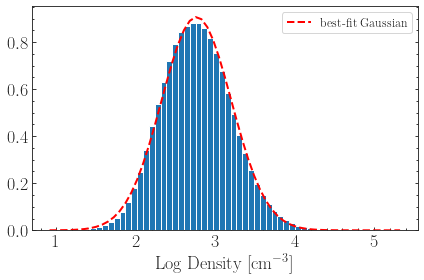

In [15]:
fig, ax=plt.subplots()
# best fit of data
(mu, sigma) = norm.fit(log_density.flatten())
# the histogram of the data
n, bins, patches = plt.hist(log_density.flatten(), 60, normed=1)

# add a 'best fit' line
print (mu, sigma)
y = scipy.stats.norm.pdf( bins, mu, sigma)

l = plt.plot(bins, y, 'r--', linewidth=2, label='best-fit Gaussian')
ax.set_xlabel(r'Log Density [cm$^{-3}$] ', fontsize=18)
plt.tight_layout()
plt.legend()
plt.minorticks_on()
plt.savefig('log_density_hist.pdf')

In [11]:
def plot_least_squares(data, bins, ax, n):
    (mu, sigma) = norm.fit(data)
    
    # add a 'best fit' line
    y = scipy.stats.norm.pdf( bins, mu, sigma)
    print ('chi square {}'.format(np.nansum((y[:-1]*data.max()/mu-n)**2)))
    l = ax.plot(bins, y*data.max()/mu, 'r--', linewidth=2, 
                label=r'$\mu$={0:.{1}f}'.format(mu, 1)+ ' '+ r'$\sigma$={0:.{1}f}'.format(sigma, 1))

    
    return 

In [12]:
log_x=np.log10(np.trapz(density*n0.value, axis=0, dx=dl.value))
log_y=np.log10(np.trapz(density*n0.value, axis=1, dx=dl.value))
log_z=np.log10(np.trapz(density*n0.value, axis=2, dx=dl.value))

chi square 2.0710997200356296
chi square 1.0062816253557822
chi square 3.5463464808332668


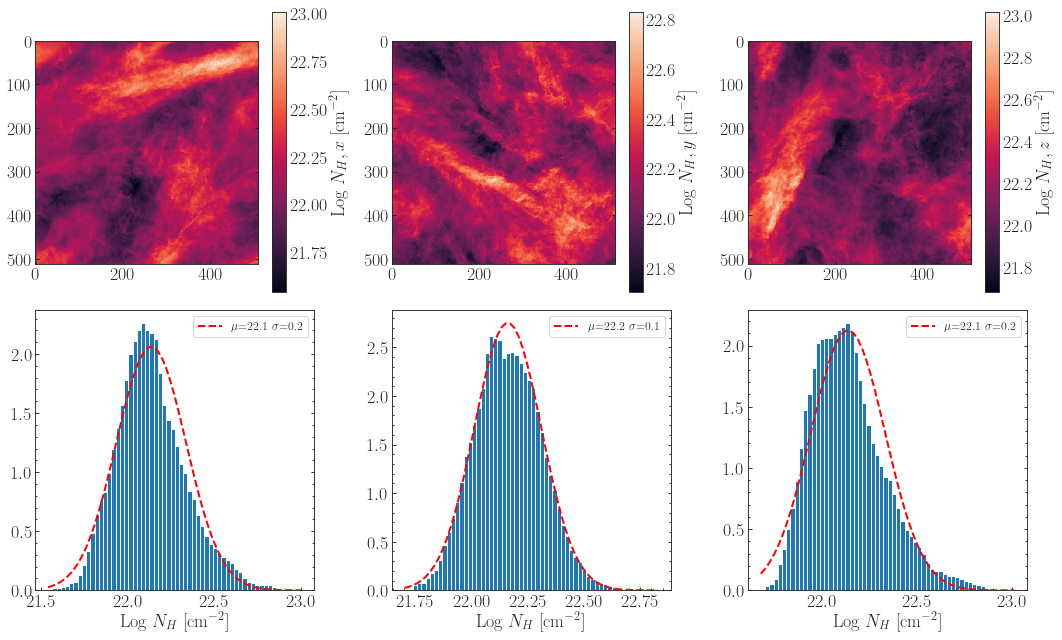

In [13]:
fig, ax=plt.subplots( figsize=(10*1.5, 6*1.5), ncols =3, nrows=2)
c0=ax[0][0].imshow(log_x)
c1=ax[0][1].imshow(log_y)
c2=ax[0][2].imshow(log_z)

cbar0=plt.colorbar(c0, ax=ax[0][0])
cbar1=plt.colorbar(c1, ax=ax[0][1])
cbar2=plt.colorbar(c2, ax=ax[0][2])

cbar0.ax.set_ylabel(r'Log $N_H, x$ [cm$^{-2}]$', fontsize=18)
cbar1.ax.set_ylabel(r'Log $N_H, y$ [cm$^{-2}]$', fontsize=18)
cbar2.ax.set_ylabel(r'Log $N_H, z$ [cm$^{-2}]$', fontsize=18)

n0, bins0, patches =ax[1][0].hist(log_x.flatten(), bins=60, normed=1.)
n1, bins1, patches=ax[1][1].hist(log_y.flatten(), bins=60, normed=1.)
n2, bins2, patches=ax[1][2].hist(log_z.flatten(), bins=60, normed=1)


plot_least_squares(log_x.flatten(), bins0, ax[1][0], n0)
plot_least_squares(log_y.flatten(), bins1, ax[1][1], n1)
plot_least_squares(log_z.flatten(), bins2, ax[1][2], n2)


for a in ax[1]:
    a.set_xlabel(r'Log $N_H$ [cm$^{-2}]$', fontsize=18)
    a.legend()
    a.minorticks_on()
    
plt.tight_layout()

plt.savefig('densitymaps.pdf')

